In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import re
import scipy.stats
from scipy.sparse import csr_matrix
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


#imports data as csv files
movies_kaggle = pd.read_csv("movies_kaggle.csv")
ratings_kaggle = pd.read_csv("ratings_kaggle.csv")

In [2]:
#shows information about the ratings_kaggle file.
ratings_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1048575 non-null  int64  
 1   movieId  1048575 non-null  int64  
 2   rating   1048575 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 24.0 MB


In [3]:
#shows information about the movies_kaggle file.
movies_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [4]:
#displays the movies_kaggle data table. 
movies_kaggle.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#displays the ratings_kaggle data table.
ratings_kaggle.head()

,userId,movieId,rating
0,1,653,3.0
1,1,1201,3.0
2,1,1243,3.0
3,1,1304,3.0
4,1,1370,3.0


In [6]:
#*********************code to search for a movie name in the database***********************************

In [7]:
#vectorizes the titles for search from the search title.
vectorizer = TfidfVectorizer(ngram_range=(1,2))

#turns titles into a matrix 
title_matrix = vectorizer.fit_transform(movies_kaggle["title"])

In [8]:
#computes the similarity of term searched and title.
def movie_search(title):
    query_vec = vectorizer.transform([title])
    c_similarity = cosine_similarity(query_vec, title_matrix).flatten()
    indices = np.argpartition(c_similarity, -5)[-5:]
    search_results = movies_kaggle.iloc[indices][::-1]
    return search_results

In [9]:
#********************End of search code. Search widget grouped by the recommender section**********************

In [10]:
#makes pivot table 
pivot_dataset = ratings_kaggle.pivot(index='movieId',columns='userId',values='rating')

In [11]:
#Replaces all NaN with zeros
pivot_dataset.fillna(0,inplace=True)
pivot_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,4.5
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0,0.0


In [12]:
#Aggregating the number of users who voted and the number of movies that were voted.
# a movie will have at least 10 users vote for it and a user should have voted for at least 50 movies
amt_users_voted = ratings_kaggle.groupby('movieId')['rating'].agg('count')
amt_movies_voted = ratings_kaggle.groupby('userId')['rating'].agg('count')
pivot_dataset = pivot_dataset.loc[:,amt_movies_voted[amt_movies_voted > 50].index]
pivot_dataset

userId,1,2,3,5,7,8,11,13,14,16,...,7104,7105,7106,7107,7110,7111,7113,7115,7116,7117
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,5.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#applies matrix to dataset
csr_sparse = csr_matrix(pivot_dataset.values)
pivot_dataset.reset_index(inplace=True)

In [14]:
# Machine Learning algorithm and recommendation system********************************

In [15]:
k_nearest = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
k_nearest.fit(csr_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [16]:

def recommend_movie(movie_name):
    amt_recommendations = 5
    movie_list = movies_kaggle[movies_kaggle['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_id = movie_list.iloc[0]['movieId']
        movie_id = pivot_dataset[pivot_dataset['movieId'] == movie_id].index[0]
        distances , indices = k_nearest.kneighbors(csr_sparse[movie_id],n_neighbors=amt_recommendations+1)    
        movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        movie_frame = []
        for val in movie_indices:
            movie_id = pivot_dataset.iloc[val[0]]['movieId']
            id = movies_kaggle[movies_kaggle['movieId'] == movie_id].index
            movie_frame.append({'Title':movies_kaggle.iloc[id]['title'].values[0],'Distance':val[1]})
        recommendation = pd.DataFrame(movie_frame,index=range(1,amt_recommendations+1))
        return recommendation
    else:
        return "I'm having trouble finding that movie. Please type the name of the movie exactly as it is in the database without the year!"

In [17]:
#*************Search for movie in database below**************************

In [18]:
#widget to search for a movie
find_movie = widgets.Text(
    value="Enter name of movie",
    description="Find Movie:",
    disabled=False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 4:
            display(movie_search(title))

find_movie.observe(on_type, names='value')
            
display(find_movie, movie_list)

Text(value='Enter name of movie', description='Find Movie:')

Output()

In [19]:
#************* Enter movie title below ***********************************************************
# Delete movie title from "recommend_movie()" and enter copied movie title between the quotations
# **********************Enter the movie title only. Not the year**********************************
#******** Top 5 movie recommendations below ******************************************************

In [27]:
recommend_movie('Die Hard')

,Title,Distance
1,Terminator 2: Judgment Day (1991),0.382663
2,"Fugitive, The (1993)",0.380655
3,Batman (1989),0.363180
4,Speed (1994),0.341917
5,True Lies (1994),0.336542


In [21]:
#************************************************************

In [22]:
#*****************graphics/visuals********************************

In [23]:
# groups how many users rated a movie a certain rating
num_types = ratings_kaggle.groupby(by='rating').size()

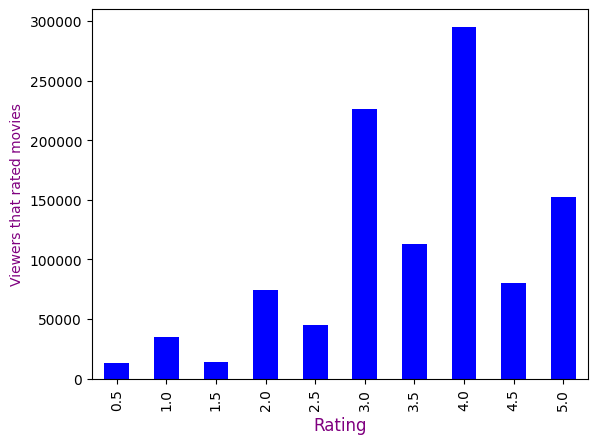

In [24]:
plot = num_types.plot.bar(color = ['blue'])
plt.xlabel('Rating', color = 'purple', fontsize = '12', horizontalalignment = 'center')
plt.ylabel('Viewers that rated movies', color = 'purple', fontsize = '10', horizontalalignment = 'center')
plt.show()
# a bar graph showing how many users rated for each star rating.

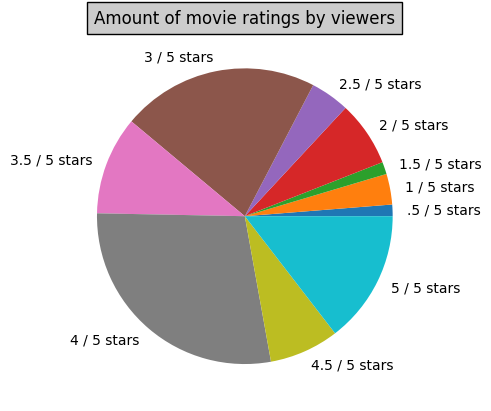

In [25]:
stars= ['.5 / 5 stars','1 / 5 stars','1.5 / 5 stars','2 / 5 stars','2.5 / 5 stars','3 / 5 stars','3.5 / 5 stars','4 / 5 stars','4.5 / 5 stars','5 / 5 stars']
plt.pie(num_types, labels=stars)
plt.title('Amount of movie ratings by viewers', bbox={'facecolor':'0.8', 'pad':5})
plt.show()
# A pie chart showing how many users rated for each star rating.

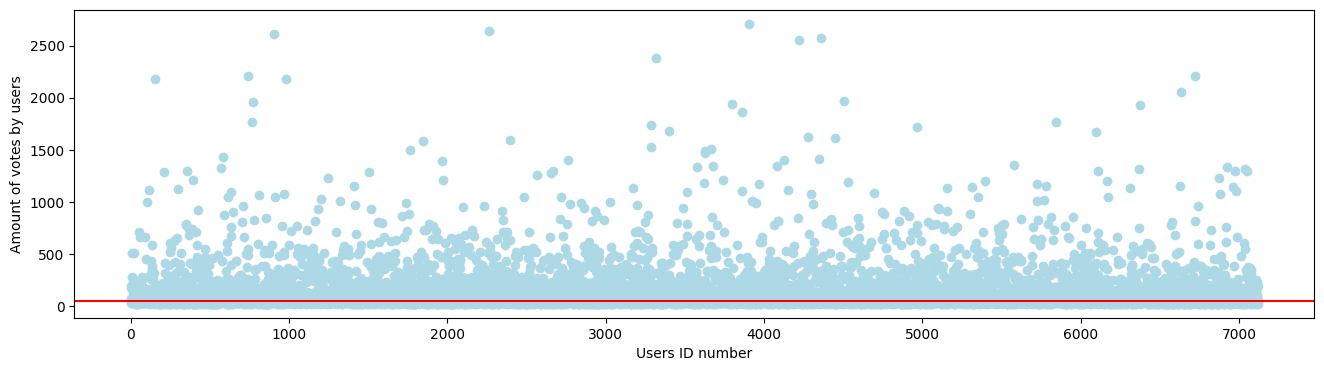

In [26]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(amt_movies_voted.index,amt_movies_voted,color='lightblue')
plt.axhline(y=50,color='r')
plt.xlabel('Users ID number')
plt.ylabel('Amount of votes by users')
plt.show()
# A scatterplot showing how many movies a user voted for and a line representing the cutoff of lower than 50.